<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Numerical Solutions (Need)</span></div>

## 1 A Bucket of water

### 1.1 Getting a feel

Text(0.5, 0, 'Time(mins)')

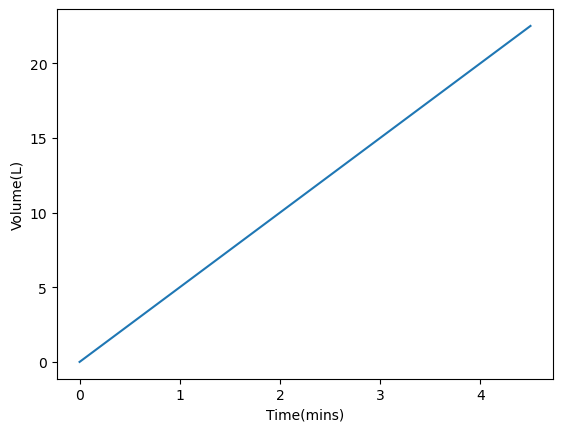

In [2]:
from matplotlib import pyplot as plt
max_time = 5                     # Maximum time (mins)
dt = .5                          # Time step (mins)
rate = 5                         # Rate (L/min)
all_volume = []                  # To keep track of all volumes
volume = 0                       # Starting volume

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)    # Record volume
    dV = rate * dt               # Calculate change in volume
    volume += dV                 # Update the new volume

# Because we can...
plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')


### 1.2 An overflowing bucket

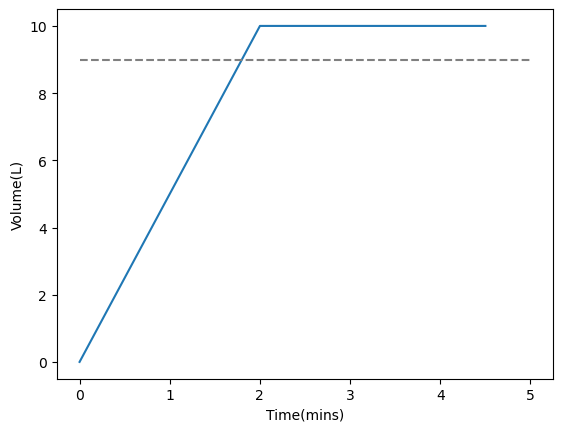

In [3]:
max_time = 5                     # Maximum time (mins)
dt = .5                          # Time step (mins)
rate = 5                         # Rate (L/min)
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
volume = 0                       # Starting volume

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)
    dV = rate * dt
    if volume <= bucket_capacity:
        volume += dV             # Update the new volume

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')


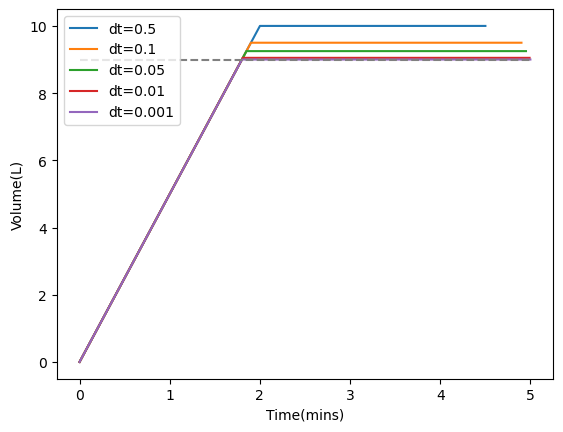

In [4]:
max_time = 5                     # Maximum time (mins)
dt = .5                          # Time step (mins)
rate = 5                         # Rate (L/min)
bucket_capacity = 9              # L

for dt in [0.5, 0.1, 0.05, 0.01, 0.001]:
    all_volume = []                  # To keep track of all volumes
    volume = 0                       # Starting volume

    all_time = np.arange(start=0, stop=max_time, step=dt)

    for time in all_time:
        all_volume.append(volume)
        dV = rate * dt
        if volume <= bucket_capacity:
            volume += dV

    plt.plot(all_time, all_volume, label=f'dt={dt}')

plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')
plt.legend()

### 1.3 A leaky bucket

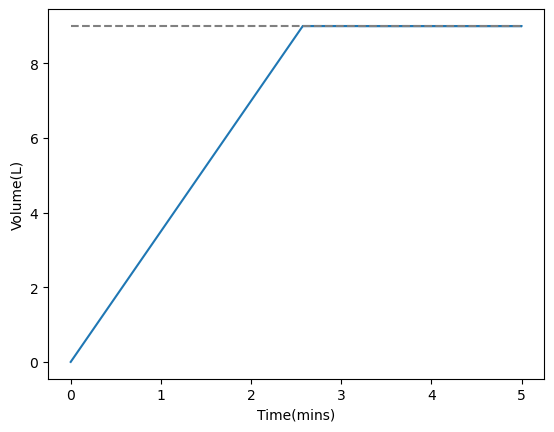

In [5]:
max_time = 5                     # Maximum time (mins)
dt = .001                        # Time step (mins)
rate = 5                         # Filling rate (L/min)
leak_rate = 1.5                  # L/min
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
volume = 0                       # Starting volume

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)

    dV = rate * dt
    leak_volume = leak_rate * dt
    volume -= leak_volume

    if volume <= bucket_capacity:
        volume += dV             # Update the new volume

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')


### 1.4 Let’s turn off the tap

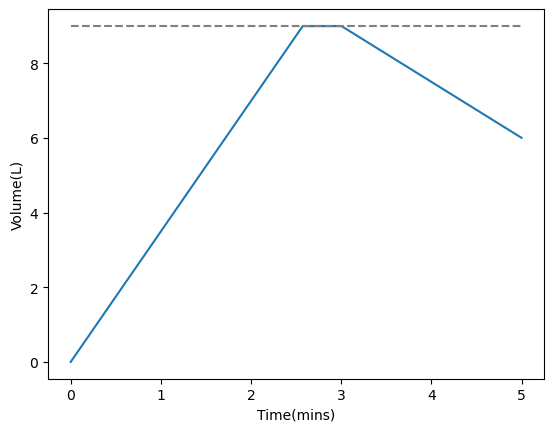

In [6]:
tap_off_time = 3                 # When the tap goes off
max_time = 5                     # Maximum time (mins)
dt = .001                        # Time step (mins)
rate = 5                         # Filling rate (L/min)
leak_rate = 1.5                  # L/min
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
volume = 0                       # Starting volume

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(volume)
    dV = rate * dt

    leak_volume = leak_rate * dt
    volume -= leak_volume

    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV             

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')


### Using while

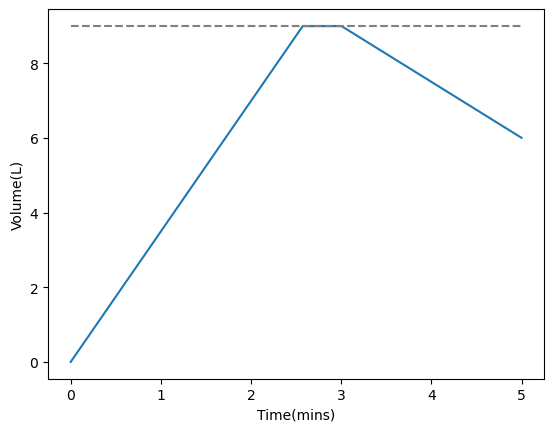

In [7]:
tap_off_time = 3                 # When the tap goes off
max_time = 5                     # Maximum time (mins)
dt = .001                        # Time step (mins)
rate = 5                         # Filling rate (L/min)
leak_rate = 1.5                  # L/min
bucket_capacity = 9              # L
all_volume = []                  # To keep track of all volumes
all_time = []                    # To keep track of all times
volume = 0                       # Starting volume
time = 0

while time <= max_time:
    all_time.append(time)
    all_volume.append(volume)
    dV = rate * dt

    leak_volume = leak_rate * dt
    volume -= leak_volume

    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV    

    time += dt             

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')


### 1.5 A quick summary

Summary:

1)Establish a relationship that connects the changes of the variables.
2)Pick a starting value
3)Take a step, and calculate the changes.
4)Update the variables
5)Keep on going until you have the desired number of points.
6)If you want to improve accuracy, take smaller steps.

### 1.6 We just solved a differential equation!

## 2 Simulating Radioactivity

### 2.1 Introduction

### 2.2 Approximating the differential equation

In [8]:
# recast equation in approximate form #


### 2.3 Getting a feel

| Step | Time | N(t) | $\Delta$t| $\Delta$N |
| : --- | :--: | :--: | :--:| --- : |
|0 | 0 | 1 | 0.001 | -0.142 |
| 1|  0.001 | 0.858 | 0.001 | -0.121 |



### 2.4 Let’s write some code

Text(0.5, 0, 'Time(Millions of years)')

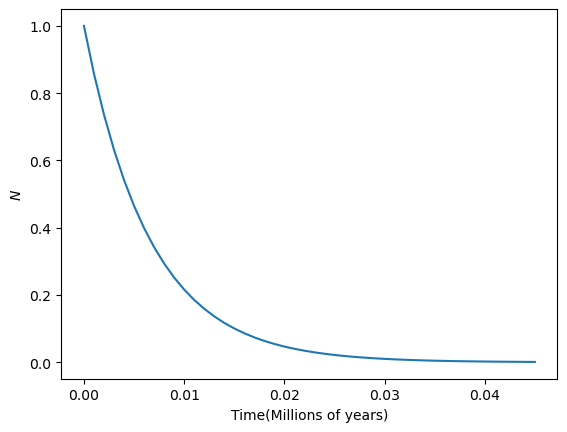

In [9]:
decay_constant = 142       # For 85 Rb (per Myr)
stop_fraction = 1E-3       # stop when the sample has shrunk to
                           # this fraction of the starting value
N0 = 1                     # Starting value of N (in billions of atoms)
dt = .001
time, N = 0, N0            # Starting values

all_N, all_time = [], []

while True:
    all_time.append(time)
    all_N.append(N)

    dN = -decay_constant*N*dt
    N += dN

    if N < N0*stop_fraction:
        break

    time += dt


plt.plot(all_time, all_N)
plt.ylabel('$N$')
plt.xlabel('Time(Millions of years)')


### 2.5 Some things to note about the code

In [10]:
# Use True condition with while loop #


### 2.6 A quick summary

Summary:
1)Rewrite the equation in an approximate form that connects the changes of one variable to another.  
2)Pick starting values for the variables.
3)Step the control variable (time in the previous case) and calculate the corresponding changes in the other variables.
4)Update the variables
5)Repeat until you reach the desired end.
6)Make the step size smaller if you want greater accuracy.

## Exercise 1 :  A more realistic leak

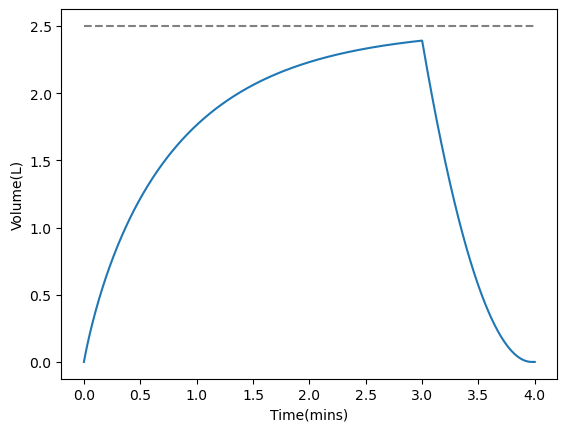

In [33]:
tap_off_time = 3                 
max_time = 4                     
dt = .001                        
rate_in = 5  
bucket_capacity = 2.5  

g=9.8

all_time = np.arange(start=0, stop=max_time, step=dt)

def leak_rate(volume):
    h = (volume/1000) / 0.07
    leak_speed = np.sqrt(max(2*g*h, 0))
    leak_rate_SI = leak_speed * 1e-4
    leak_rate = leak_rate_SI*1000*60
    return leak_rate
    
   
    
      
all_volume = []                 
volume = 0                      

all_time = np.arange(start=0, stop=max_time, step=dt)

for time in all_time:
    all_volume.append(max(volume, 0))
    dV = rate_in * dt

    leak_volume = leak_rate(volume) * dt
    volume -= leak_volume

    if (volume <= bucket_capacity) and (time < tap_off_time):
        volume += dV             

plt.plot(all_time, all_volume)
plt.ylabel('Volume(L)')
plt.xlabel('Time(mins)')
plt.hlines(bucket_capacity, 0, max_time, colors='grey', ls='dashed')